<a href="https://colab.research.google.com/github/joaochenriques/FFT_Testing/blob/main/FFT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as mpl

In [4]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0  21237      0 --:--:-- --:--:-- --:--:-- 21237


In [5]:
f = 2.0
ω = 2.0 * np.pi * f 
t = np.linspace( 0, 100, 1024 )
y = np.sin( ω * t  )

In [6]:
nFFT = 1024

fsample = 1.0 / ( t[1] - t[0] )
delta_f = fsample / nFFT

fd_time = np.arange( nFFT ) / fsample
fd_data = np.copy( y )  

(0.4997557997412335, 0.7067614298686652)

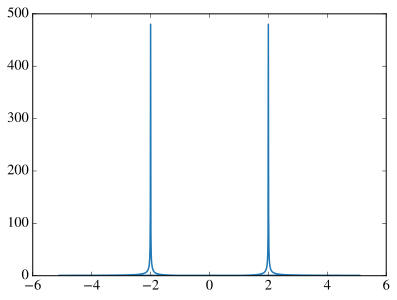

In [8]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( fd_data, norm='backward' )            # FFT complex amplitudes


Spec_Af  = np.abs( Amps ) / nFFT                         # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )

Spec_A_mean, np.linalg.norm( Amps ) / nFFT

0.9995120739522929

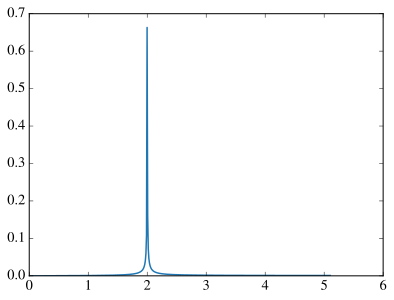

In [6]:
freqs = np.fft.rfftfreq( n = nFFT, d = 1.0 / fsample )      # FFT frequencies
Amps = np.sqrt(2) * np.fft.rfft( fd_data, norm='forward' )  # FFT complex amplitudes

Spec_Af  = 2.0 * np.abs( Amps )                             # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                                 # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                               # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )           # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )
Spec_A_mean

(0.7067610943676748, (1024,))

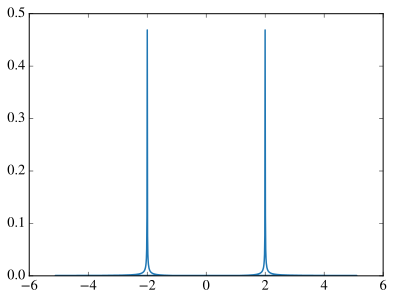

In [7]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( fd_data, norm='forward' )            # FFT complex amplitudes

Spec_Af  = 2.0 * np.abs( Amps[0:nFFT//2] )                         # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )

Spec_A_mean, Amps.shape

Text(0, 0.5, 'Amplitude')

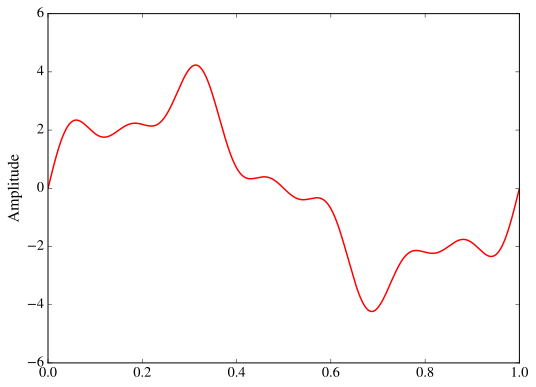

In [8]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

mpl.figure(figsize = (8, 6))
mpl.plot(t, x, 'r')
mpl.ylabel('Amplitude')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.997e+03, 1.998e+03,
       1.999e+03])

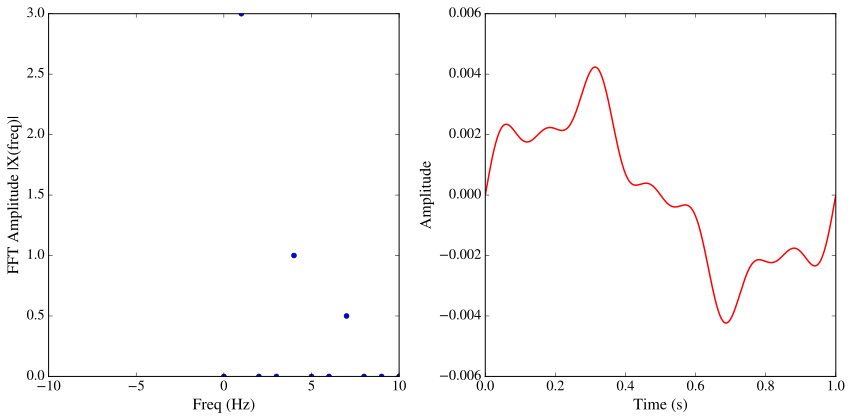

In [9]:
from numpy.fft import fft, ifft

X = 2*fft(x, norm='forward' )
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

mpl.figure(figsize = (12, 6))
mpl.subplot(121)

mpl.plot(freq, np.abs(X), 'ob' )#, \
         #markerfmt=" ", basefmt="-b")
mpl.xlabel('Freq (Hz)')
mpl.ylabel('FFT Amplitude |X(freq)|')
mpl.xlim(-10, 10)

mpl.subplot(122)
mpl.plot(t, ifft(X), 'r')
mpl.xlabel('Time (s)')
mpl.ylabel('Amplitude')
mpl.tight_layout()
freq

(0.9995111250124166, 0.9995111250124167)

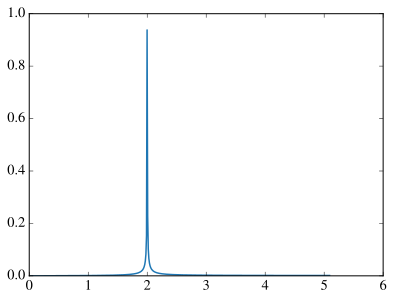

In [12]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( fd_data, norm='forward' )            # FFT complex amplitudes

freqs = freqs[0:nFFT//2]
Amps = 2*Amps[0:nFFT//2]

Spec_Af  = np.abs( Amps )                               # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, np.abs( Amps ) )

Spec_A_mean * np.sqrt(2.0), np.sqrt( np.sum(Spec_Af**2) )